In [27]:
#Dataset: https://www.kaggle.com/mathan/fifa-2018-match-statistics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

### This notebook aims to perform a Exploratory Data Analysis (EDA) of the FIFA 2018 World Cup stats data. Furthermore, a model for the prediction of the Man of the Match, based on the match stats will be developed

#### Data Analysis

In [28]:
df = pd.read_csv('FIFA 2018 Statistics.csv')

In [29]:
df.head(10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [30]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

#### Data tranformations

In [32]:
#rename specific column in order to keep some coherence in the column names

df = df.rename(columns={"Yellow Card": "Yellow"})

In [33]:
#change target type

df['Man of the Match'] = df['Man of the Match'].map({'Yes': 1, 'No': 0})

In [34]:
#change team and opponent variable type. Convert the coutry name to its position in FIFA ranking

rankings = {
'Argentina': 9,
 'Australia': 42,
 'Belgium': 1,
 'Brazil': 3,
 'Colombia': 10,
 'Costa Rica': 46,
 'Croatia': 6,
 'Denmark': 16,
 'Egypt': 51,
 'England': 4,
 'France': 2,
 'Germany': 15,
 'Iceland': 39,
 'Iran': 33,
 'Japan': 28,
 'Korea Republic': 40,
 'Mexico': 11,
 'Morocco': 43,
 'Nigeria': 31,
 'Panama': 81,
 'Peru': 21,
 'Poland': 19,
 'Portugal': 7,
 'Russia': 38,
 'Saudi Arabia': 67,
 'Senegal': 20,
 'Serbia': 29,
 'Spain': 8,
 'Sweden': 17,
 'Switzerland': 12,
 'Tunisia': 27,
 'Uruguay': 5
    
}

df['Team'] = df['Team'].map(rankings)
df['Opponent'] = df['Opponent'].map(rankings)


The columns *Team* and *Opponent* were transformed from categorical variables to numeric variables. Due to the large number of values in these columns, One Hot encoding was not used as it would create a significant number of extra columns (features). Thus, in order for the numeric values to have some meaning, the FIFA ranking was used for converting each Team/Opponent name to its position in the ranking

### Missing values Analysis

In [35]:
print("Percentage of Missing Values")

round(df.isnull().sum()/len(df) * 100, 2)

Percentage of Missing Values


Date                       0.00
Team                       0.00
Opponent                   0.00
Goal Scored                0.00
Ball Possession %          0.00
Attempts                   0.00
On-Target                  0.00
Off-Target                 0.00
Blocked                    0.00
Corners                    0.00
Offsides                   0.00
Free Kicks                 0.00
Saves                      0.00
Pass Accuracy %            0.00
Passes                     0.00
Distance Covered (Kms)     0.00
Fouls Committed            0.00
Yellow                     0.00
Yellow & Red               0.00
Red                        0.00
Man of the Match           0.00
1st Goal                  26.56
Round                      0.00
PSO                        0.00
Goals in PSO               0.00
Own goals                 90.62
Own goal Time             90.62
dtype: float64

By analysing the missing values percentage, we can se that only three columns contain Nans. The first is **1st Goal**, this column indicates the time when the goal occured, as we have information regarding the number of total goal scored, the time when the first goal was scored is not relevant, thus this column will be dropped.

The two other columns are the **Own goals** and the **Own goal Time**. The percentage of Nan values is significant (90.62%), thus, using the remaining data (9.48%) would be challenging to fill this column with accurate results, this way these two columns will be also dropped.


In [36]:
df.drop(columns = ['1st Goal', 'Own goals', 'Own goal Time'], inplace = True)

### Values Distribution

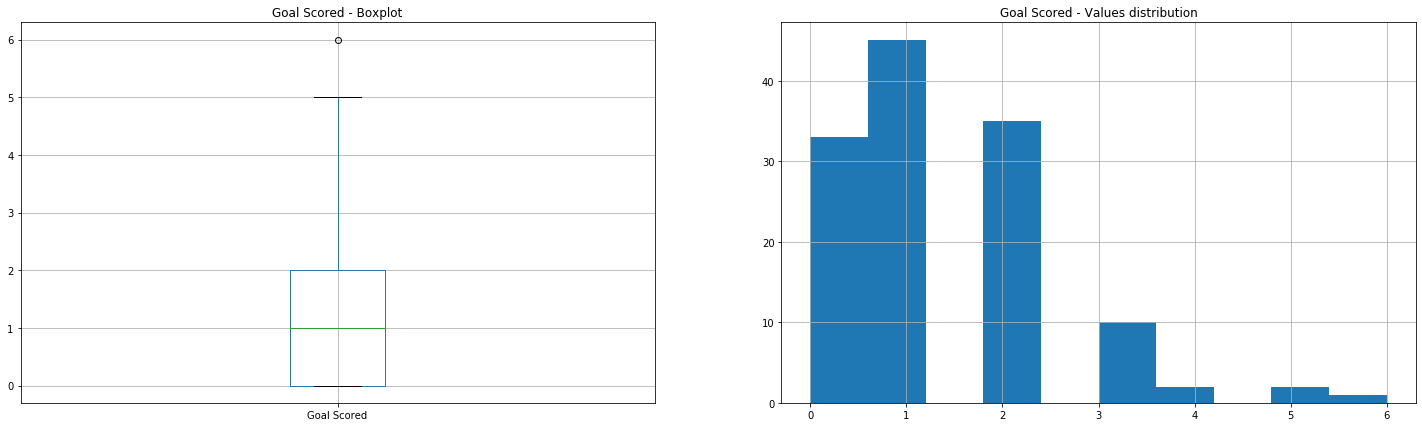

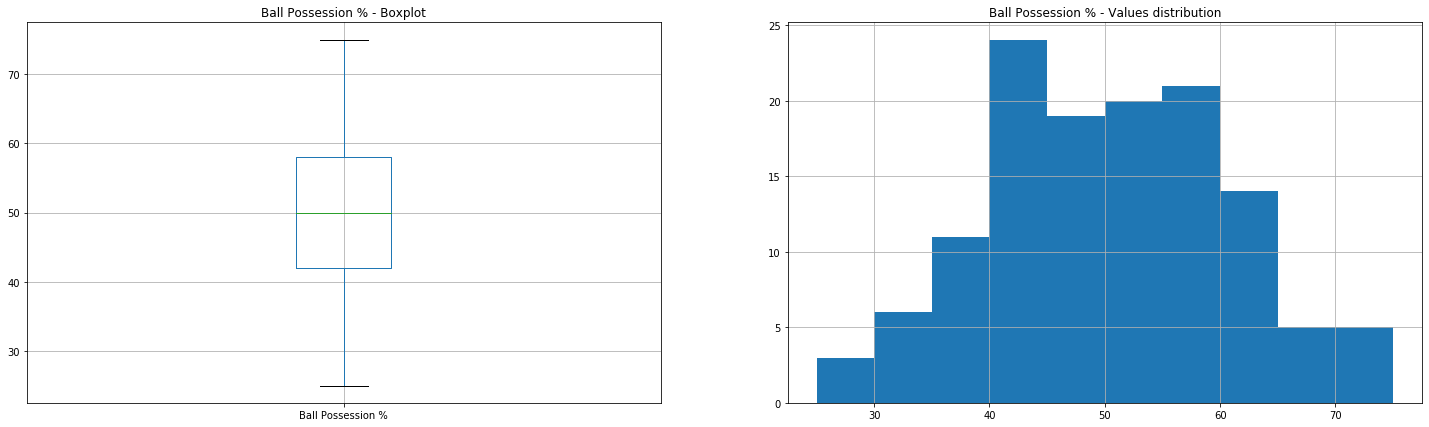

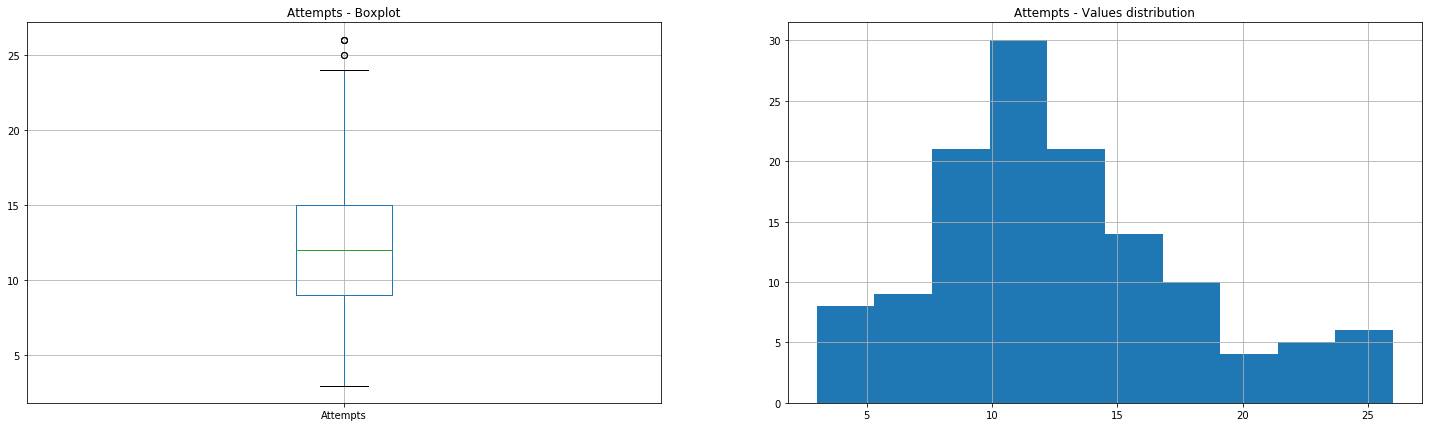

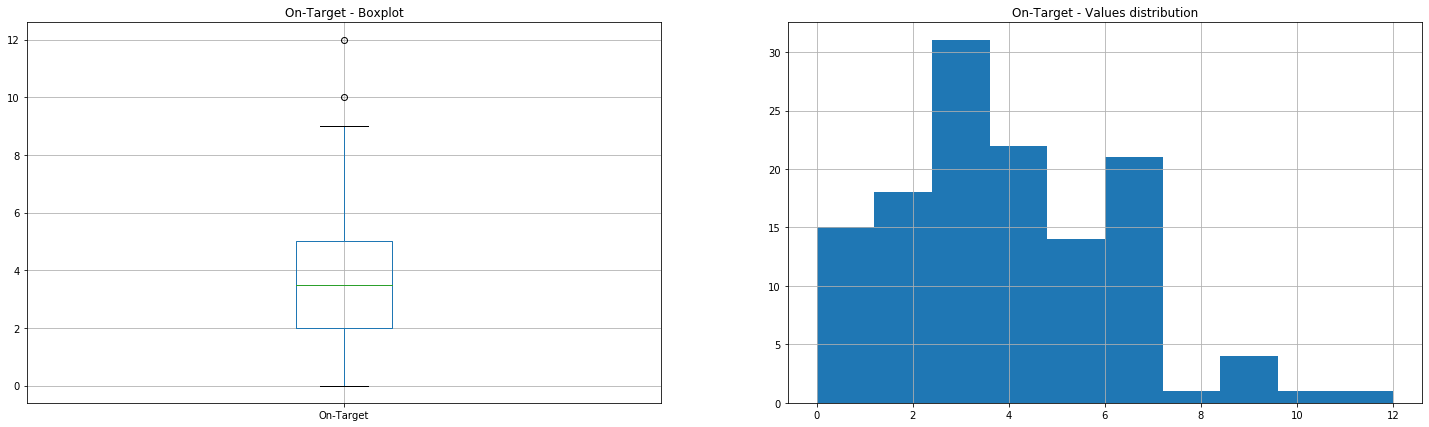

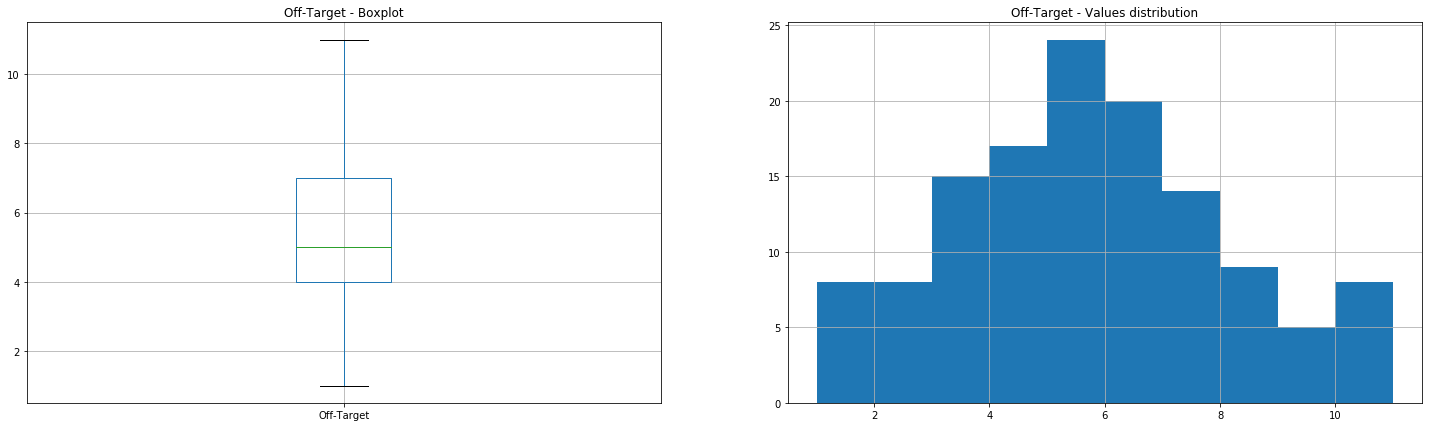

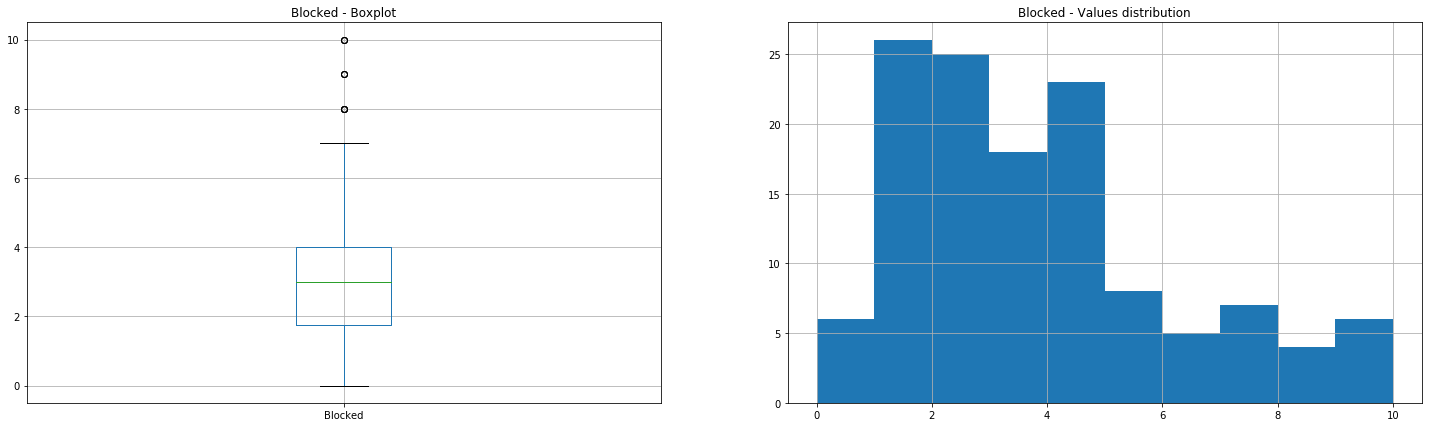

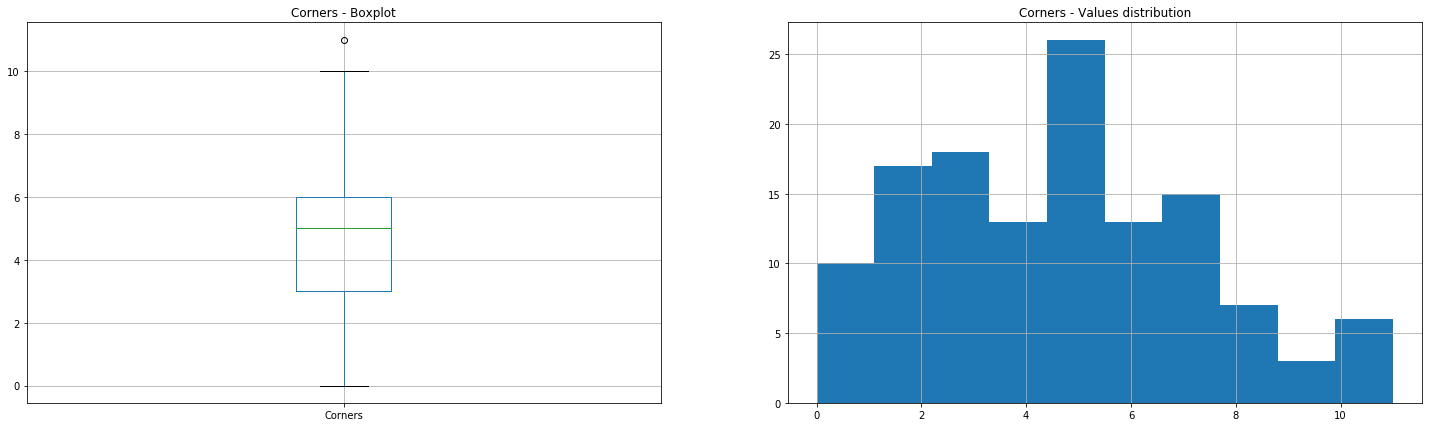

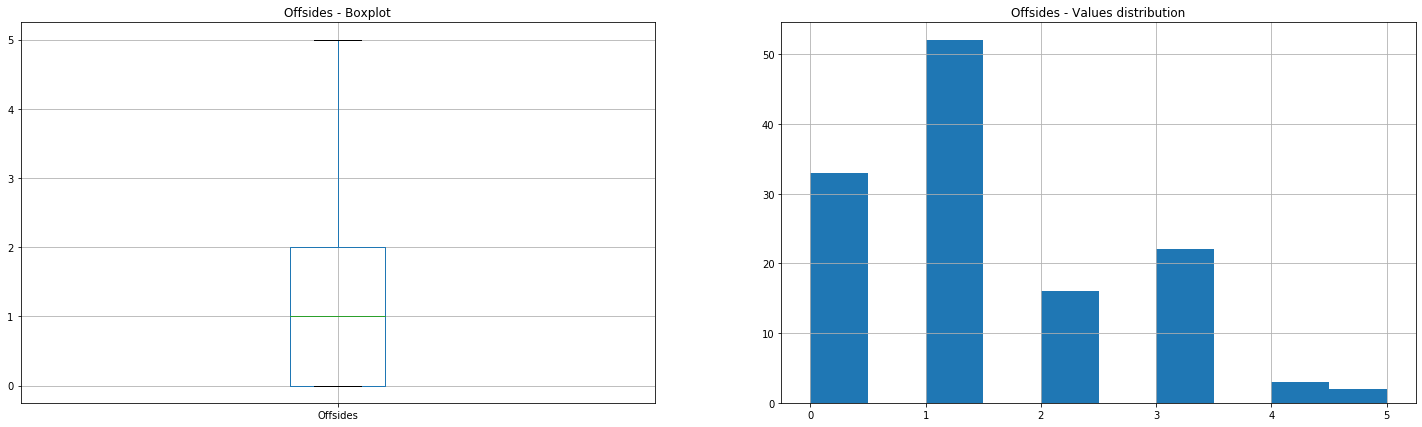

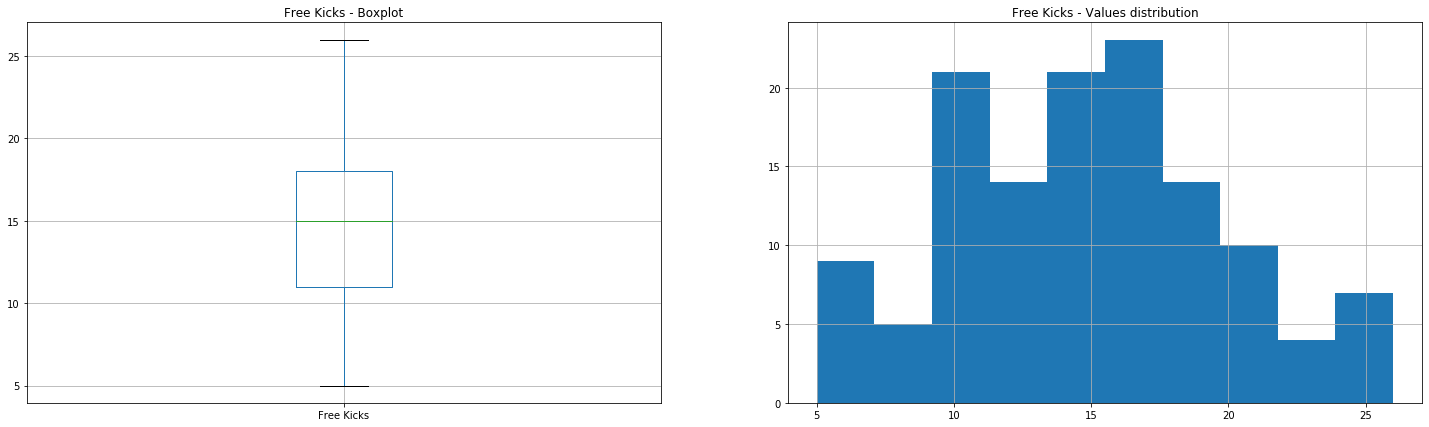

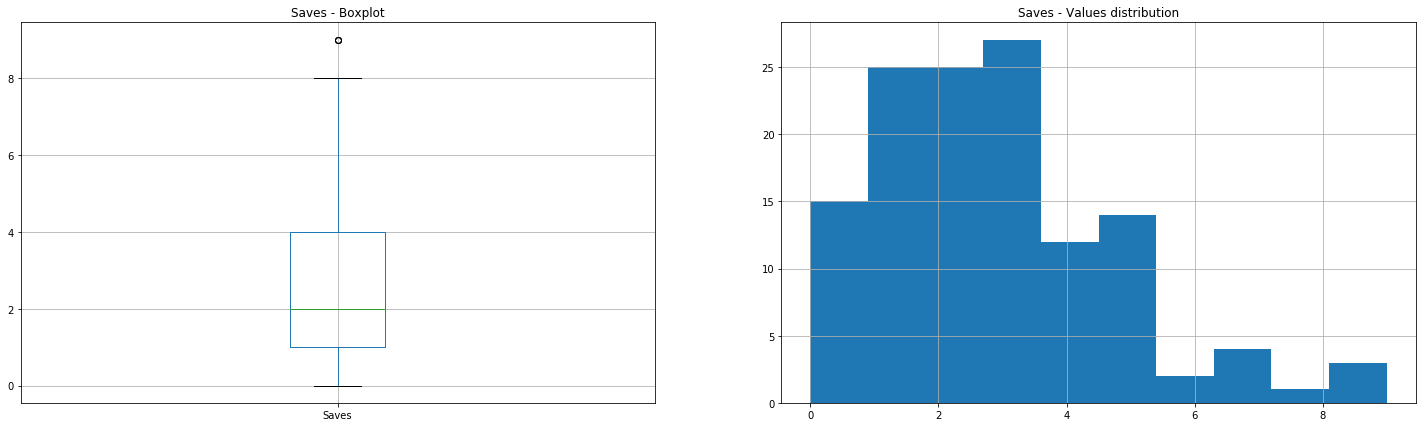

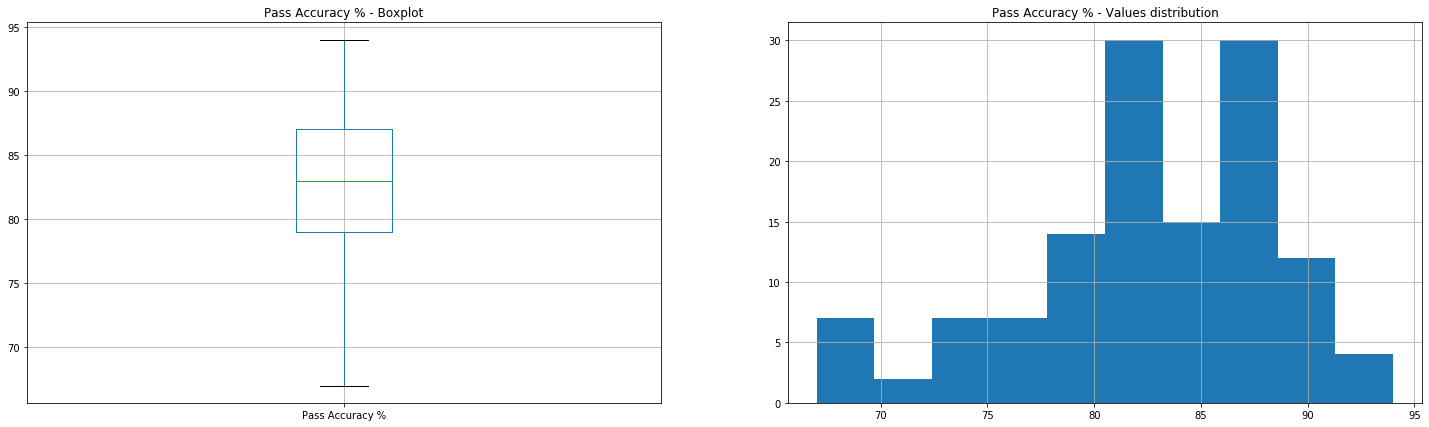

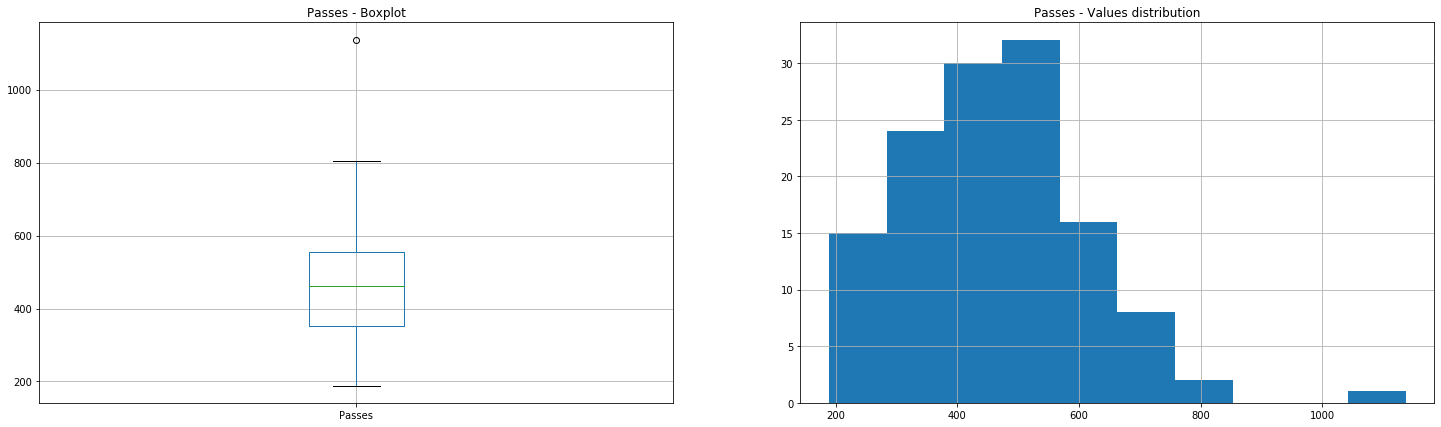

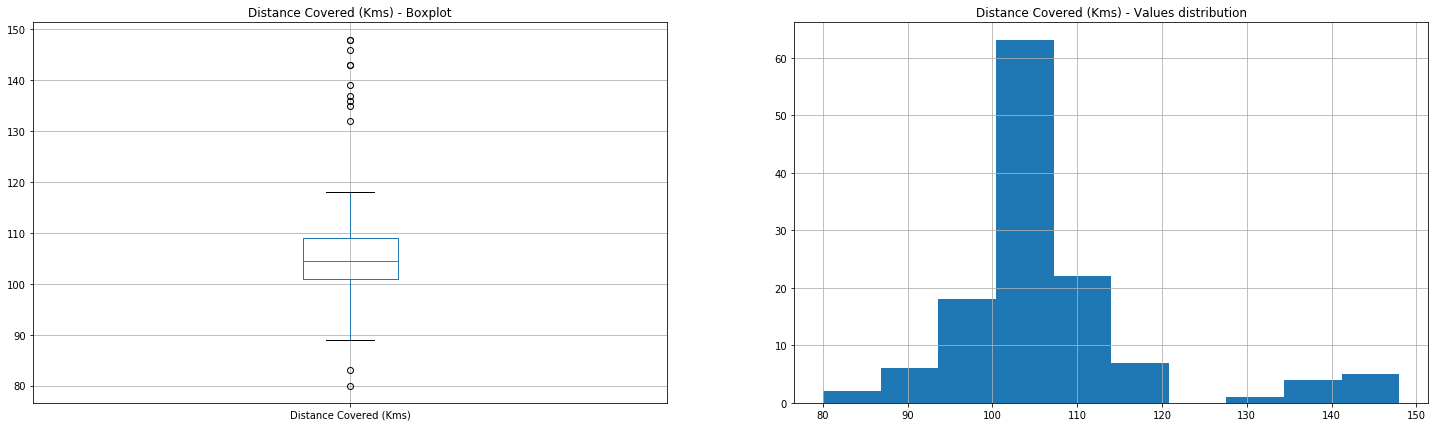

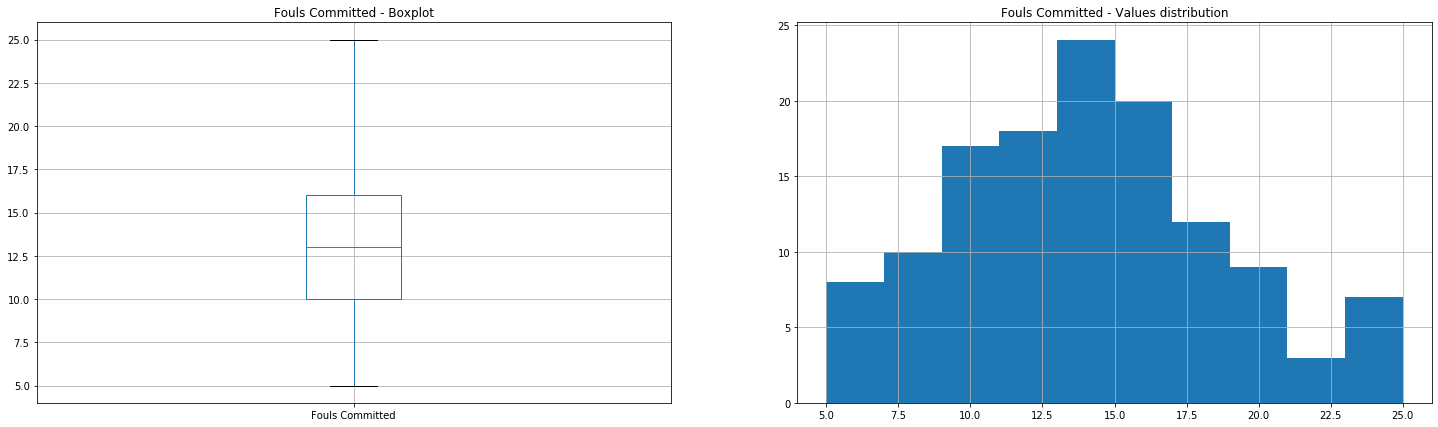

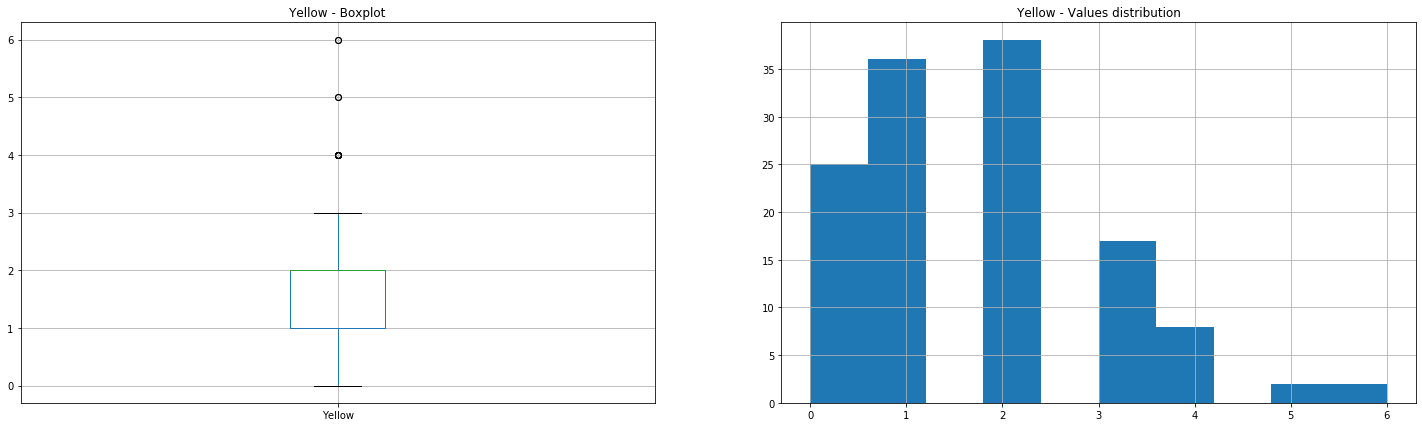

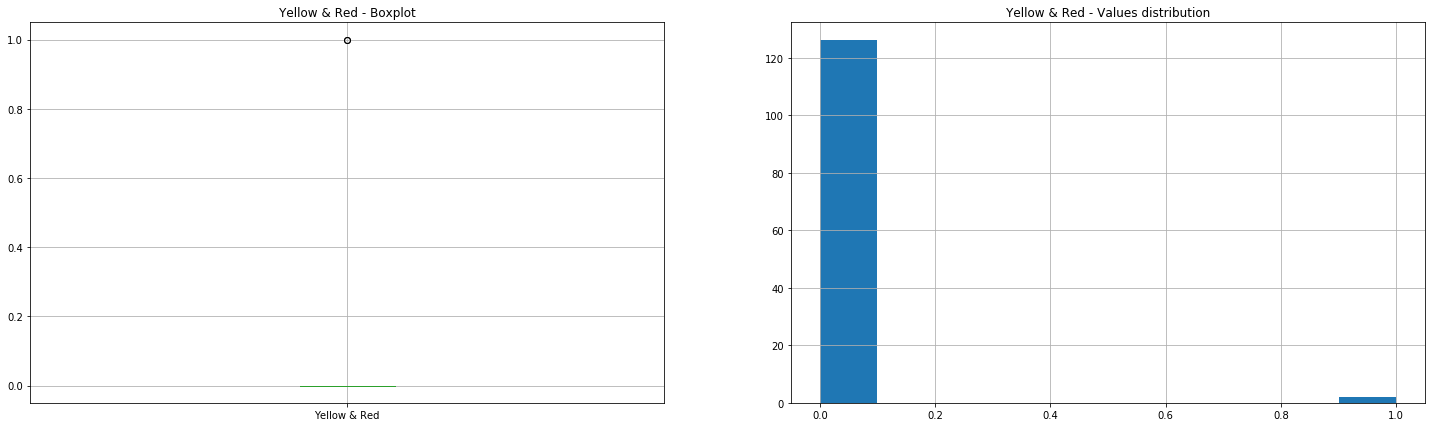

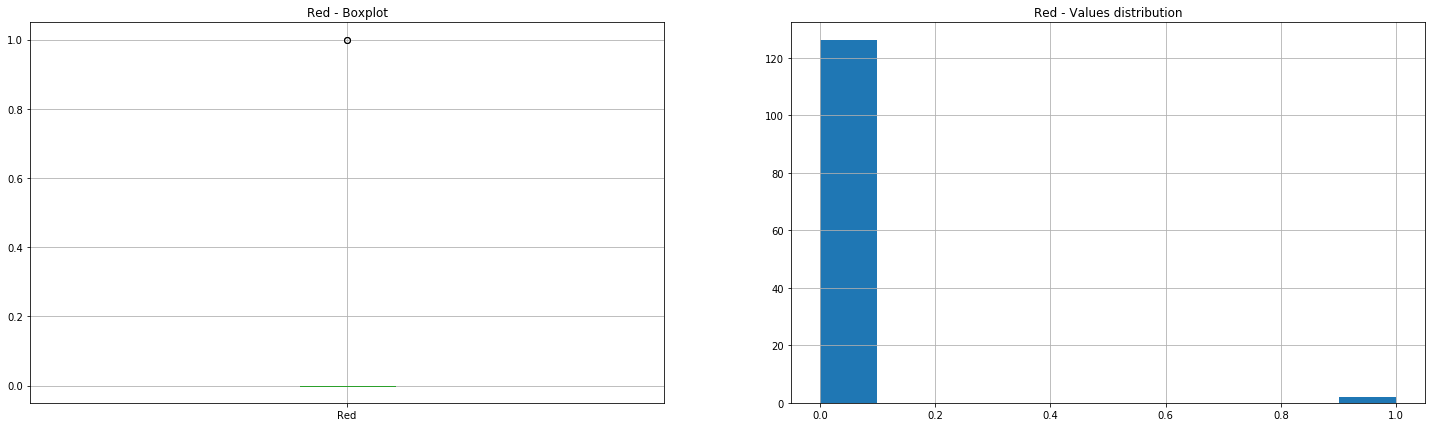

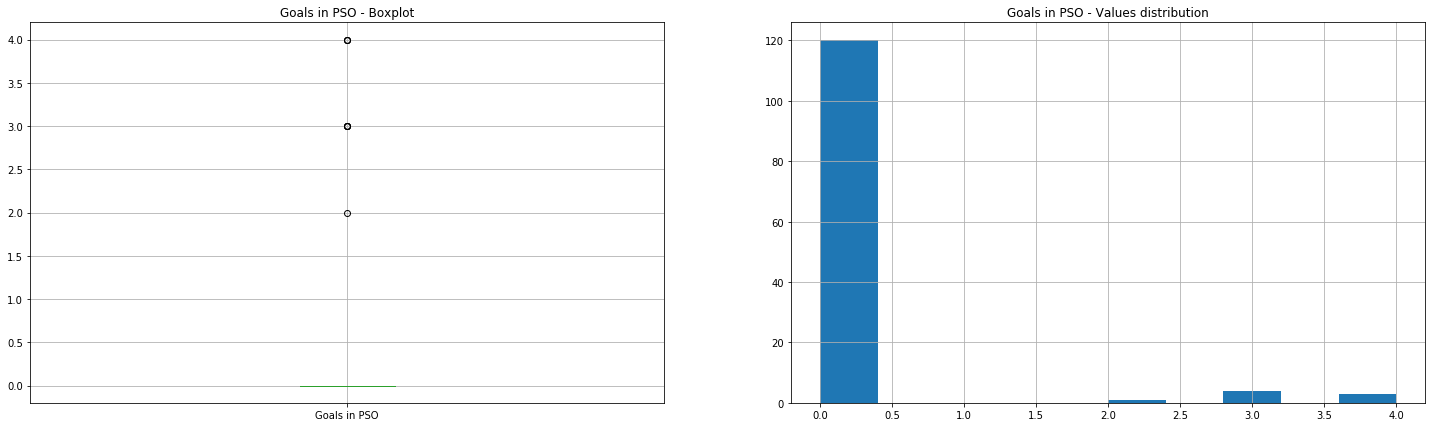

In [37]:
for col in list(df.columns):
    if col not in ['Date', 'Opponent', 'Team', 'Man of the Match', 'Round', 'PSO']:

        fig, ax = plt.subplots(1, 2, figsize=(25, 7))
        df.boxplot(column=[col], ax = ax[0])
        df[col].hist(ax = ax[1])
        
        ax[0].set_title(col + ' - Boxplot')
        ax[1].set_title(col + ' - Values distribution')
        
        plt.show()

### Feature Selection

As the *Date* and *Round* columns do not contain relevant information for the prediction of the Man of the Match, these columns will be removed

In [38]:
df[['Yellow', 'Red', 'Yellow & Red']].corr()

,Yellow,Red,Yellow & Red
Yellow,1.000000,0.029075,-0.114064
Red,0.029075,1.000000,-0.015873
Yellow & Red,-0.114064,-0.015873,1.000000


In [39]:
df[df['Yellow & Red'] > 0]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow,Yellow & Red,Red,Man of the Match,Round,PSO,Goals in PSO
56,23-06-2018,15,17,2,71,16,5,4,7,8,...,699,111,12,0,1,0,1,Group Stage,No,0
65,25-06-2018,38,5,0,44,3,1,1,1,2,...,355,98,18,1,1,0,0,Group Stage,No,0


By analysing the table above, we can see that, in fact, the *Yellow & Red* column is not in accordance with the *Yellow* and *Red*, thus the column *Yellow & Red* will just add noise to the data and so will be removed

In [40]:
df.groupby('Goals in PSO')['PSO'].value_counts()

Goals in PSO  PSO
0             No     120
2             Yes      1
3             Yes      4
4             Yes      3
Name: PSO, dtype: int64

The information in the columns *PSO* and *Goals in PSO* are redundant, as the information in column *PSO* is represented in the column *Goals in PSO*. This way, the column *PSO* will also be removed

In [41]:
df.drop(columns = ['Date', 'Round', 'Yellow & Red', 'PSO'], inplace = True)

In [42]:
#Split data in Train and Test

X_train, X_test, y_train, y_test = train_test_split(df, df['Man of the Match'], test_size = 0.2, random_state = 0)

#### Correlation between variables

In [43]:
cor = abs(X_train.corr()['Man of the Match']).sort_values(ascending=False)[1:]

In [44]:
relevant_features = cor[cor > 0.15]

print("Relevant features: ", relevant_features.index.values)

Relevant features:  ['Goal Scored' 'Team' 'Opponent' 'On-Target' 'Fouls Committed' 'Attempts'
 'Yellow' 'Off-Target' 'Corners']


In [45]:
relevant_features = relevant_features.index.values

In [46]:
X_train = X_train[relevant_features]
X_test = X_test[relevant_features]

### Feature Categorization

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 20 columns):
Team                      128 non-null int64
Opponent                  128 non-null int64
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow                    128 non-null int64
Red                       128 non-null int64
Man of the Match          128 non-null int64
Goals in PSO              128 non-null i

In [48]:
def convert_to_categorical(df, column_names):
    
    for col in column_names:
        if col in df.columns:
            df[col] = df[col].astype('category')
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1, sort=False)
            df.drop([col], axis=1, inplace=True)
    
    return df


#cat_columns = ['Team', 'Opponent']
#df = convert_to_categorical(df, cat_columns)

In this case there are not categorical variables left in the data

In [49]:
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow,Red,Man of the Match,Goals in PSO
0,38,67,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,1,0
1,67,38,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,51,5,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,5,51,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,1,0
4,43,33,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


### ML model for predicting the **Man of the Match**

In [50]:
#Simple Feedforward

classifier = Sequential()

classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


history = classifier.fit(X_train, y_train, epochs = 300, validation_split=0.2, verbose=0)

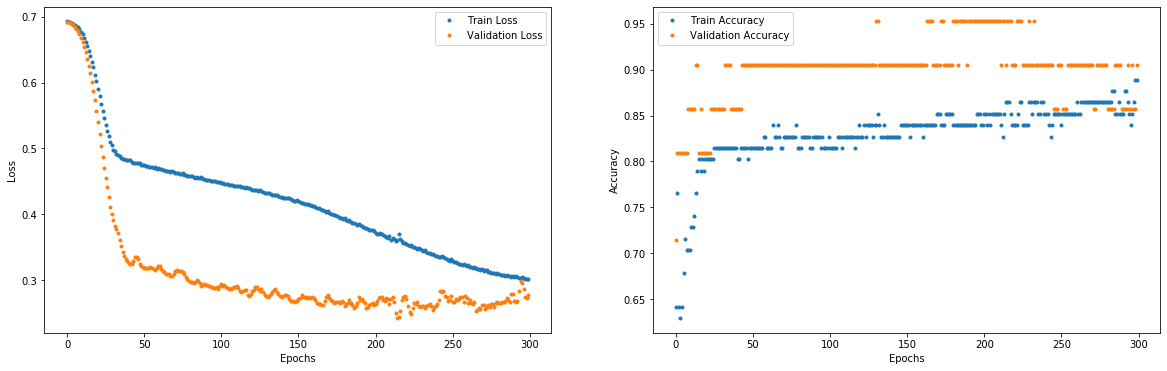

In [51]:
def plot_train_evolution(history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    ax[0].plot(history['loss'], '.', label='Train Loss')
    ax[0].plot(history['val_loss'], '.', label='Validation Loss')
    
    
    ax[1].plot(history['accuracy'], '.', label='Train Accuracy')
    ax[1].plot(history['val_accuracy'], '.', label='Validation Accuracy')
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].legend()
    
    plt.show()
    
plot_train_evolution(history.history)

#### Parameter Tuning

Cross Validation

In [54]:

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return classifier

classifier = KerasClassifier(build_fn = build_classifier)


parameters = {'epochs': [150, 200, 300],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train, verbose=0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_model = grid_search.best_estimator_

print('Best Params: ', best_parameters, '\nBest Accuracy: ', best_accuracy)

/Users/danielazevedo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Params:  {'epochs': 150, 'optimizer': 'adam'} 
Best Accuracy:  0.8235294117647058


In [55]:
# Test
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Test Accuracy:  0.8076923076923077
Confusion Matrix:
[[ 8  3]
 [ 2 13]]


In the resulting model, the test accuracy was about 81%, which can still be improved. In future work, other type of Machine Learning models should be tested. Also, other types of feature selection, besides correlation, may be used in order to try improve the results
